In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [7]:
# Creat an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, amd set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | ballangen
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | haines junction
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | portland
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | edd
Processing Record 16 of Set 1 | north platte
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | ahipara
Pr

Processing Record 37 of Set 4 | tonneins
Processing Record 38 of Set 4 | kuvshinovo
Processing Record 39 of Set 4 | vila
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | kabalo
Processing Record 42 of Set 4 | itupiranga
Processing Record 43 of Set 4 | garissa
Processing Record 44 of Set 4 | biak
Processing Record 45 of Set 4 | longavi
Processing Record 46 of Set 4 | finschhafen
Processing Record 47 of Set 4 | akhtanizovskaya
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | whangarei
Processing Record 50 of Set 4 | tual
Processing Record 1 of Set 5 | rio verde de mato grosso
Processing Record 2 of Set 5 | san isidro
Processing Record 3 of Set 5 | manicore
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | sao filipe
Processing Record 6 of Set 5 | camacha
Processing Record 7 of Set 5 | nsoko
Processing Record 8 of Set 5 | marang
Processing Record 9 of Set 5 | saleaula
City not found. Skipping...
Processing Record 10 of Set 5 | c

Processing Record 25 of Set 8 | noyabrsk
Processing Record 26 of Set 8 | kashi
Processing Record 27 of Set 8 | shkotovo-26
City not found. Skipping...
Processing Record 28 of Set 8 | papara
Processing Record 29 of Set 8 | ponnani
Processing Record 30 of Set 8 | grand forks
Processing Record 31 of Set 8 | zhanaozen
Processing Record 32 of Set 8 | jabinyanah
Processing Record 33 of Set 8 | pochutla
Processing Record 34 of Set 8 | lehi
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | faro
Processing Record 37 of Set 8 | labuhan
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 8 | natal
Processing Record 41 of Set 8 | senahu
Processing Record 42 of Set 8 | port-gentil
Processing Record 43 of Set 8 | khandyga
Processing Record 44 of Set 8 | hovd
Processing Record 45 of Set 8 | westport
Processing Record 46 of Set 8 | george
Processing Record 47 of Set 8 | lambarene
Processing

Processing Record 15 of Set 12 | khanu woralaksaburi
Processing Record 16 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 17 of Set 12 | turukhansk
Processing Record 18 of Set 12 | kralendijk
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | biabou
Processing Record 21 of Set 12 | lardos
Processing Record 22 of Set 12 | qasigiannguit
Processing Record 23 of Set 12 | rumonge
Processing Record 24 of Set 12 | urumqi
Processing Record 25 of Set 12 | coihueco
Processing Record 26 of Set 12 | antalaha
Processing Record 27 of Set 12 | ormara
Processing Record 28 of Set 12 | nioaque
Processing Record 29 of Set 12 | haukipudas
Processing Record 30 of Set 12 | verbivka
Processing Record 31 of Set 12 | la rochelle
Processing Record 32 of Set 12 | hasaki
Processing Record 33 of Set 12 | chizhou
Processing Record 34 of Set 12 | fairbanks
Processing Record 35 of Set 12 | khonuu
City not found. Skipping...
Processing Record 36 of Set 12 | ales
Processing R

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,84.25,89,40,1.14,MU,2022-01-29 04:51:17
1,Ballangen,68.3428,16.8315,21.42,63,0,8.05,NO,2022-01-29 04:51:18
2,Albany,42.6001,-73.9662,21.27,69,100,3.00,US,2022-01-29 04:50:12
3,Mataura,-46.1927,168.8643,67.48,34,70,6.40,NZ,2022-01-29 04:51:18
4,Ushuaia,-54.8000,-68.3000,53.26,76,40,5.75,AR,2022-01-29 04:51:07
5,Hermanus,-34.4187,19.2345,62.91,78,33,11.54,ZA,2022-01-29 04:51:19
6,Haines Junction,60.7522,-137.5108,19.35,73,100,4.61,CA,2022-01-29 04:51:19
7,Grindavik,63.8424,-22.4338,27.07,68,75,17.27,IS,2022-01-29 04:51:20
8,Dikson,73.5069,80.5464,1.78,94,100,18.52,RU,2022-01-29 04:51:20
9,Hamilton,39.1834,-84.5333,15.64,83,0,1.99,US,2022-01-29 04:51:21


In [9]:
# Reorder columns.
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-01-29 04:51:17,-20.4081,57.7000,84.25,89,40,1.14
1,Ballangen,NO,2022-01-29 04:51:18,68.3428,16.8315,21.42,63,0,8.05
2,Albany,US,2022-01-29 04:50:12,42.6001,-73.9662,21.27,69,100,3.00
3,Mataura,NZ,2022-01-29 04:51:18,-46.1927,168.8643,67.48,34,70,6.40
4,Ushuaia,AR,2022-01-29 04:51:07,-54.8000,-68.3000,53.26,76,40,5.75
5,Hermanus,ZA,2022-01-29 04:51:19,-34.4187,19.2345,62.91,78,33,11.54
6,Haines Junction,CA,2022-01-29 04:51:19,60.7522,-137.5108,19.35,73,100,4.61
7,Grindavik,IS,2022-01-29 04:51:20,63.8424,-22.4338,27.07,68,75,17.27
8,Dikson,RU,2022-01-29 04:51:20,73.5069,80.5464,1.78,94,100,18.52
9,Hamilton,US,2022-01-29 04:51:21,39.1834,-84.5333,15.64,83,0,1.99


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

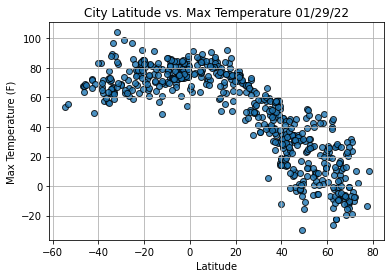

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

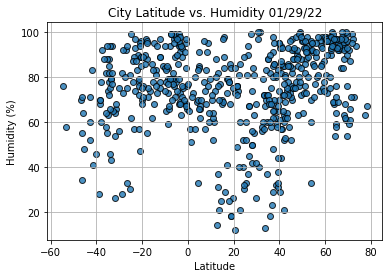

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

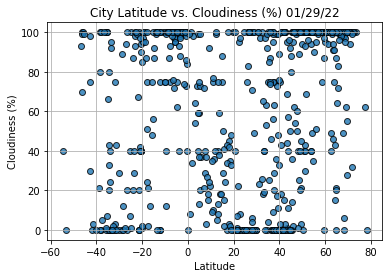

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()